# **Assignment 2.1**: Data Cleaning and EDA with Time Series Data
# **Name**: Satyam Kumar

**Introduction**

As a student, this assignment provides an opportunity to explore real-world time-series data related to household electric power consumption. The dataset includes important variables like active and reactive power, voltage, current intensity, and energy usage for specific appliances. The main goal is to clean the data, perform exploratory analysis, and visualize trends over time. By computing moving averages and identifying patterns, this assignment helps develop a deeper understanding of energy usage behaviors and prepares me to apply data analysis techniques to practical problems.

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [55]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [34]:
df1 = pd.read_csv("household_power_consumption.txt", delimiter = ";")

<ipython-input-34-96ad914bdcbe>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [35]:
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [36]:
df1.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [37]:
df1.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [38]:
#make a copy of the raw data so that we can go back and refer to it later
df = df1.copy()

In [40]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
print("First 5 rows':")
print(df[['Datetime', 'Date', 'Time']].head())

First 5 rows':
             Datetime        Date      Time
0 2006-12-16 17:24:00  16/12/2006  17:24:00
1 2006-12-16 17:25:00  16/12/2006  17:25:00
2 2006-12-16 17:26:00  16/12/2006  17:26:00
3 2006-12-16 17:27:00  16/12/2006  17:27:00
4 2006-12-16 17:28:00  16/12/2006  17:28:00


In [42]:
# Convert all data columns to numeric
data_columns = df.columns.difference(['Datetime'])  # Exclude 'Datetime' column
df[data_columns] = df[data_columns].apply(pd.to_numeric, errors='coerce')

# Display the first few rows now
print("First 5 rows after converting data columns to numeric:")
print(df.head())

First 5 rows after converting data columns to numeric:
   Date  Time  Global_active_power  Global_reactive_power  Voltage  \
0   NaN   NaN                4.216                  0.418   234.84   
1   NaN   NaN                5.360                  0.436   233.63   
2   NaN   NaN                5.374                  0.498   233.29   
3   NaN   NaN                5.388                  0.502   233.74   
4   NaN   NaN                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:00  
3

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [43]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [44]:
# Display the first few rows for verification
print("First 5 rows after splitting 'Datetime' into 'Date' and 'Time':")
print(df[['Datetime', 'Date', 'Time']].head())

First 5 rows after splitting 'Datetime' into 'Date' and 'Time':
             Datetime        Date      Time
0 2006-12-16 17:24:00  2006-12-16  17:24:00
1 2006-12-16 17:25:00  2006-12-16  17:25:00
2 2006-12-16 17:26:00  2006-12-16  17:26:00
3 2006-12-16 17:27:00  2006-12-16  17:27:00
4 2006-12-16 17:28:00  2006-12-16  17:28:00


In [45]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [46]:
df.Date[0]

datetime.date(2006, 12, 16)

In [47]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [48]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

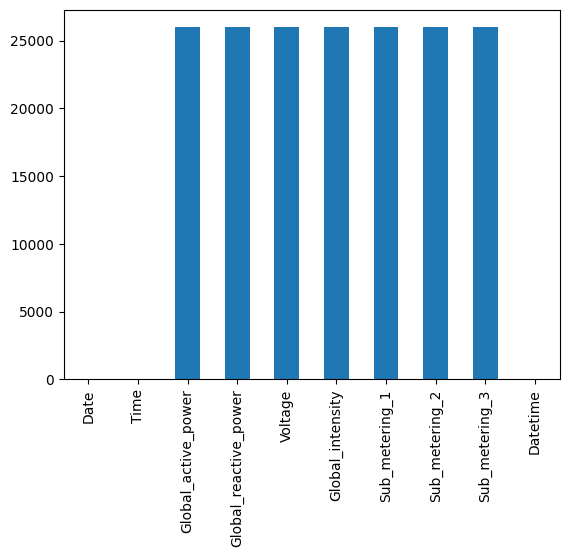

In [49]:
df.isna().sum().plot.bar()

Observation: The bar chart shows missing data counts per column, with Datetime likely having fewer entries than the other columns.

<Axes: xlabel='Date'>

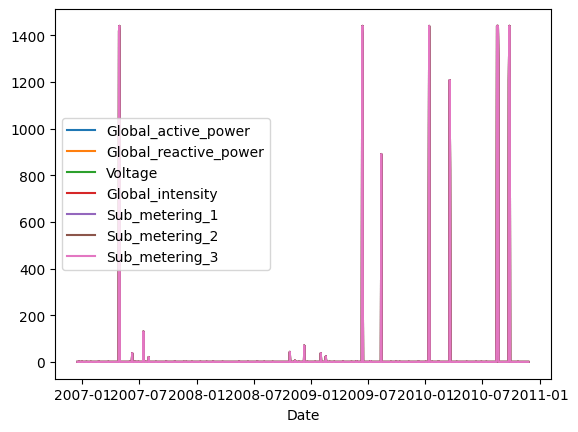

In [51]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

The chart  is used to **visualize missing values** in the dataset across different dates for selected variables. Here's what it conveys:
I think it makes sense to explain the code first.

1. **Identify Missing Values**:
   - The `isna()` function checks for missing values in each column of the dataset (`df`).
   - A new DataFrame (`df_na`) is created, where `True` values for missing data are represented as `1`.

2. **Group by Date**:
   - The dataset is grouped by the `Date` column using `.groupby(df.Date)`.
   - For each date, the number of missing values for each variable is calculated using `.sum()`.

3. **Reset the Index**:
   - The `.reset_index()` function is used to convert the grouped `Date` back into a standard DataFrame column, making it easier to plot.

4. **Plot Missing Data**:
   - The `.plot()` function is used to visualize the count of missing values (`y`) over time (`x='Date'`) for each column.
   - Each variable is displayed as a separate line on the graph.

### Chart Insights:
- The chart shows spikes on specific dates where certain variables have a significant number of missing values.
- **Sub_metering_3** has the highest number of missing values, as indicated by its prominent pink spikes.
- Other variables appear to have very few or no missing values on most dates.
### All in all,
This visualization helps in:
1. **Identifying Problematic Dates**: we can pinpoint specific dates where data collection or logging failed.
2. **Guiding Data Cleaning**: Based on the visualization, decisions can be made to handle missing data (e.g., dropping rows, imputing values, or excluding problematic variables).

**Q: What do you notice about the pattern of missing data?**

**A:** The pattern of missing data is irregular, with specific dates exhibiting significant spikes in missing values across multiple columns. These patterns are not random but likely result from systemic issues such as:
1. **Data Logging Failures:** On certain dates, large portions of the data appear to be missing, which could indicate equipment malfunctions or interruptions in data collection.
2. **Variable-Specific Gaps:** Some variables, like `Sub_metering_3`, have higher instances of missing values compared to others, suggesting either sensor-specific issues or a lack of logging for certain sub-metered appliances during those periods.
3. **Time-Series Nature:** The missing data aligns with the temporal aspect of the dataset, making the gaps more structured and predictable compared to random missing values. This provides an opportunity to address the missing data without discarding large portions of the dataset.  

The observed pattern emphasizes the need for careful handling to ensure that critical information and trends are not lost during data cleaning.


**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

**A:** Imputation using **time-series interpolation** is the most logical approach for dealing with missing data in this dataset. Here's why:

1. **Time-Series Context:**  
   - The dataset is inherently time-dependent, meaning that adjacent data points are likely correlated. For example, power consumption and voltage fluctuations often follow continuous patterns. Linear or spline interpolation can effectively estimate missing values by leveraging this temporal correlation.

2. **Preserving Trends and Patterns:**  
   - Interpolation maintains the continuity of the time-series data, ensuring that downstream analyses, such as trend detection or seasonality analysis, remain accurate. Dropping rows, on the other hand, could disrupt these trends and introduce biases.

3. **Impact on Downstream Tasks:**  
   - In machine learning models or predictive analytics, missing data can reduce model performance. Interpolating the data ensures completeness, making it more suitable for training robust models without losing valuable historical information.

4. **Alternative Approaches Considered:**  
   - **Dropping Rows:** This would lead to a significant loss of data, particularly on dates with many missing values. Given the size and scope of the dataset, this is not ideal.
   - **Forward/Backward Filling:** While simple, these methods assume that the last known or next known value is representative of the missing period, which may not always hold true in time-series data.
   - **Mean/Median Imputation:** These methods ignore the temporal structure of the dataset and would fail to capture the actual trends or variability in the data.

5. **Why Interpolation is Ideal:**  
   - It balances accuracy and efficiency by filling in missing values in a way that reflects the natural flow of the data. Interpolation methods, such as linear or polynomial, provide flexibility to approximate the data more closely based on the observed patterns.

In conclusion, interpolation is the most effective method for this dataset as it minimizes information loss, preserves trends, and ensures that the dataset remains suitable for downstream analyses.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [52]:
#clean up missing data here
# Use forward fill to fill missing values
df_filled = df.fillna(method='ffill', axis=0)

# Use backward fill as a fallback to fill any remaining missing values
df_filled = df_filled.fillna(method='bfill', axis=0)

# Verify that missing values are filled
print("Missing values after forward and backward filling:")
print(df_filled.isna().sum())

<ipython-input-52-b21138415db4>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill', axis=0)
<ipython-input-52-b21138415db4>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df_filled.fillna(method='bfill', axis=0)


Missing values after forward and backward filling:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


### Explanation:
1. **Forward Fill (ffill)**:
   - Propagates the last known value forward to fill gaps.
   - Suitable for time-series data where the previous value can be assumed valid for subsequent missing entries.

2. **Backward Fill (bfill)**:
   - Propagates the next known value backward to fill gaps that remain after forward filling.
   - Acts as a fallback for cases where missing values occur at the beginning of the dataset.

### Benefits:
- **Preserves Continuity**: Maintains smooth transitions in time-series data.
- **Simple and Efficient**: Computationally faster than other imputation techniques.

In [54]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:
**A:**

1. **Global_active_power**:  
   This variable measures the total household electricity consumption, making it the most comprehensive indicator of overall energy usage. Tracking this over time can reveal daily, seasonal, or annual patterns, and is particularly useful for understanding periods of peak demand or unusual energy usage.

2. **Voltage**:  
   Voltage fluctuations can highlight issues with the electricity supply or grid stability. Comparing voltage trends with power consumption variables can help identify potential anomalies or stress on the electrical system caused by high demand.

3. **Sub_metering_1**:  
   This variable reflects the energy usage for specific household appliances. Analyzing it over time provides granular insights into how and when certain devices are used, which may indicate lifestyle patterns or efficiency improvements (e.g., transitioning to energy-efficient devices).

4. **Sub_metering_2**:  
   Similar to Sub_metering_1, this variable focuses on a different set of appliances. Comparing it to Sub_metering_1 can help identify differences in usage trends between different types of appliances or circuits. It also adds depth to understanding how specific parts of the household contribute to overall power consumption.

**Why Compare These Variables?**  
These four variables collectively provide a well-rounded view of household energy usage:
- **Global_active_power** gives a holistic perspective, while **Voltage** adds context about the grid's performance.  
- **Sub_metering_1** and **Sub_metering_2** add granularity by isolating appliance-specific usage patterns, enabling deeper insights into energy consumption behavior.  

This combination ensures a balanced approach to analyzing overall trends, system performance, and detailed appliance-level energy usage.


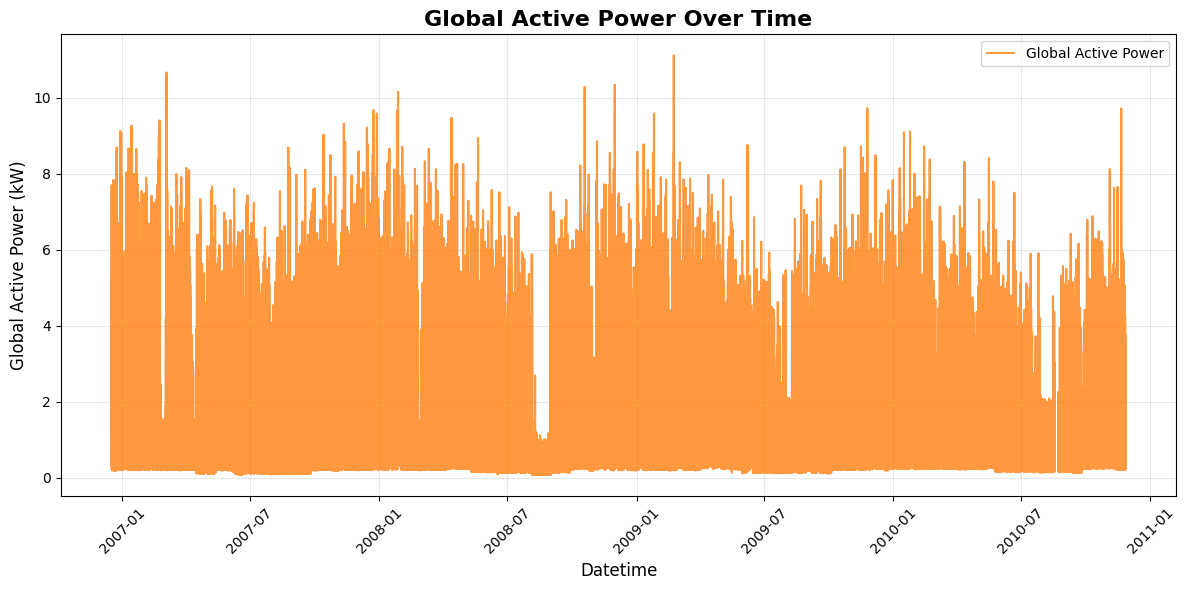

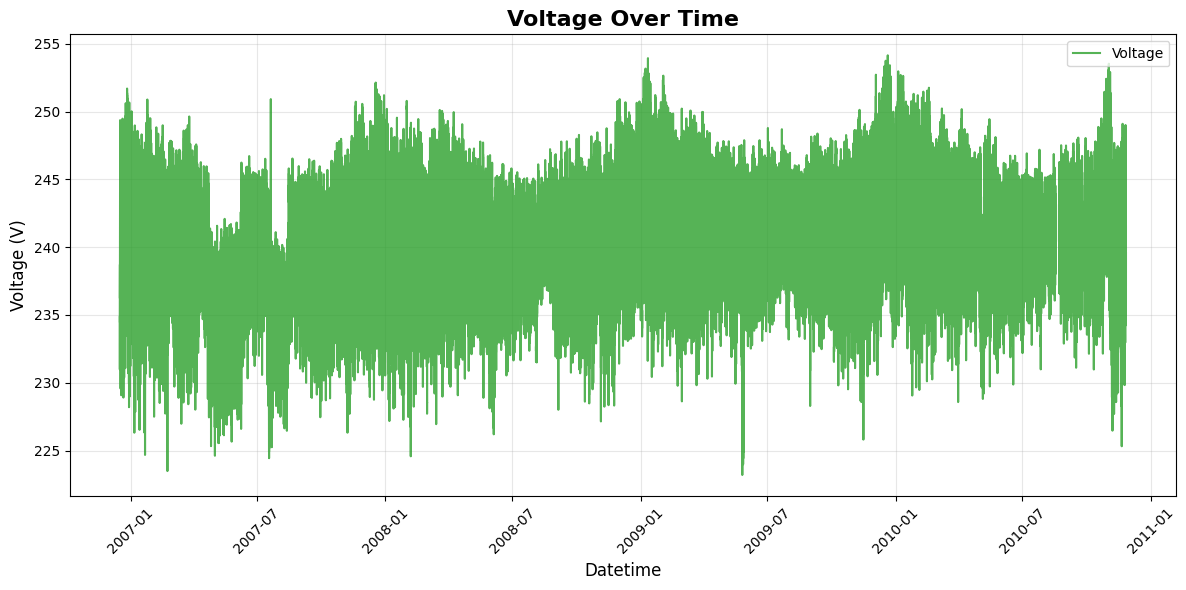

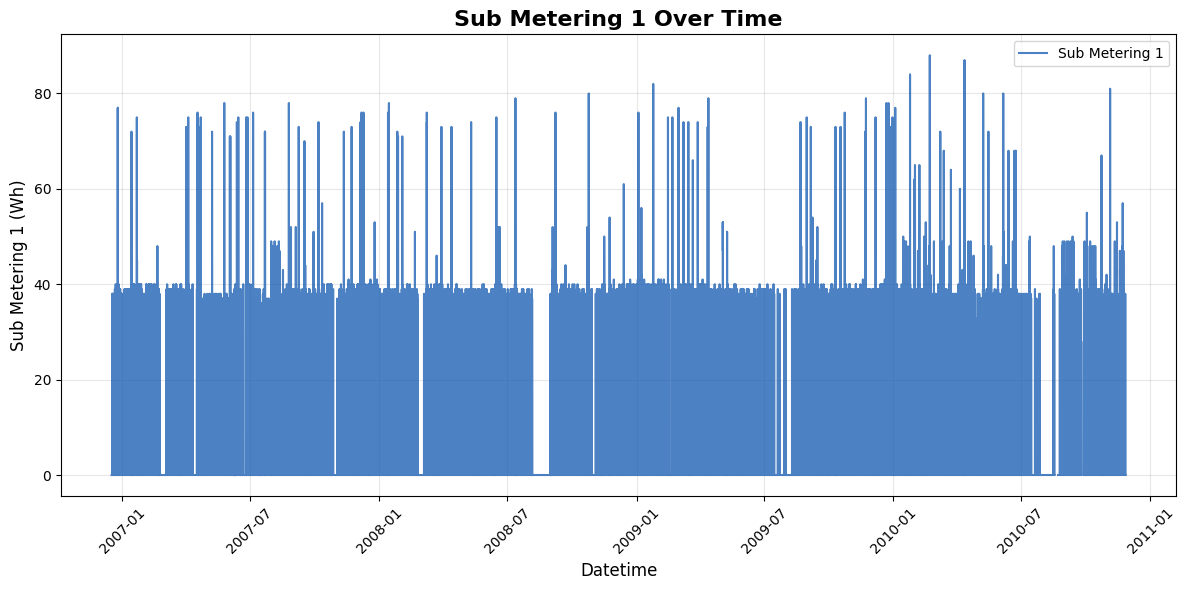

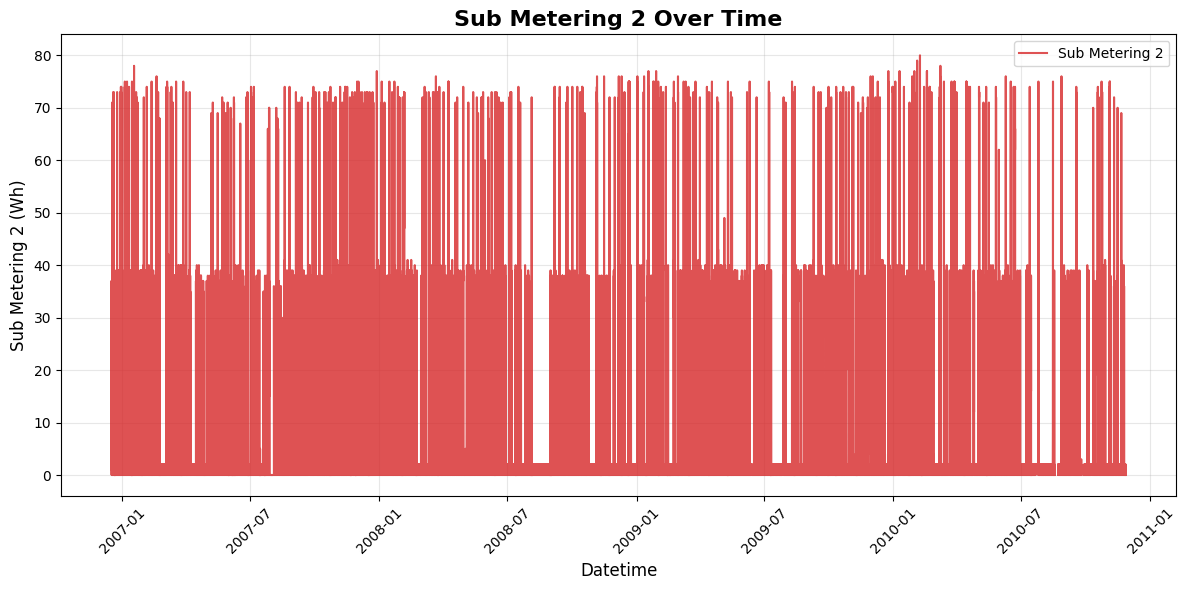

In [61]:
# Define a function to set common chart properties
def plot_time_series(x, y, title, xlabel, ylabel, color, label):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color=color, label=label, linewidth=1.5, alpha=0.8)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format x-axis dates
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot Global_active_power over time
plot_time_series(
    x=df['Datetime'],
    y=df['Global_active_power'],
    title='Global Active Power Over Time',
    xlabel='Datetime',
    ylabel='Global Active Power (kW)',
    color='#ff7f0e',  # Light blue
    label='Global Active Power'
)

# Plot Voltage over time
plot_time_series(
    x=df['Datetime'],
    y=df['Voltage'],
    title='Voltage Over Time',
    xlabel='Datetime',
    ylabel='Voltage (V)',
    color='#2ca02c',  # Light green
    label='Voltage'
)

# Plot Sub_metering_1 over time
plot_time_series(
    x=df['Datetime'],
    y=df['Sub_metering_1'],
    title='Sub Metering 1 Over Time',
    xlabel='Datetime',
    ylabel='Sub Metering 1 (Wh)',
    color='#1f62b4',  # Orange
    label='Sub Metering 1'
)

# Plot Sub_metering_2 over time
plot_time_series(
    x=df['Datetime'],
    y=df['Sub_metering_2'],
    title='Sub Metering 2 Over Time',
    xlabel='Datetime',
    ylabel='Sub Metering 2 (Wh)',
    color='#d62728',  # Red
    label='Sub Metering 2'
)


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:
**A:**

1. **Observations:**
   - The raw data visualizations highlight overall trends, such as periods of high or low activity, and help identify patterns like recurring peaks (e.g., in `Global_active_power`).
   - However, the high density of data points makes it challenging to discern finer details, especially for long-term trends or smaller fluctuations.
   - Variables like `Sub_metering_1` and `Sub_metering_2` exhibit irregular patterns with noticeable spikes and gaps, which may indicate specific appliance usage or previously imputed missing data.

2. **Usefulness:**
   - Raw data visualizations provide a good starting point for exploring trends and detecting anomalies. They are useful for an initial understanding of the dataset’s structure.
   - However, due to the density and scale of time-series data, these visualizations are not well-suited for detailed analysis or actionable insights.
   - To make the visualizations more interpretable:
     - **Aggregation** (e.g., computing monthly or daily averages) helps summarize data trends.
     - **Zooming into specific time periods** enables the exploration of short-term patterns or anomalies.
     - Applying **smoothing techniques** like moving averages can help reduce noise and highlight trends more effectively.


**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [62]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
numeric_df = df[['Datetime'] + list(df.select_dtypes(include=['float64', 'int64']).columns)]


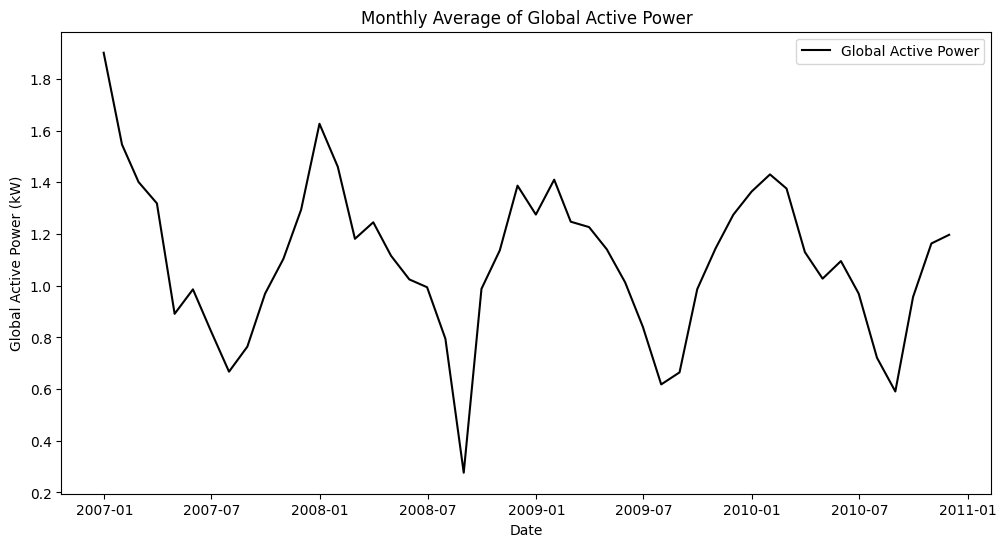

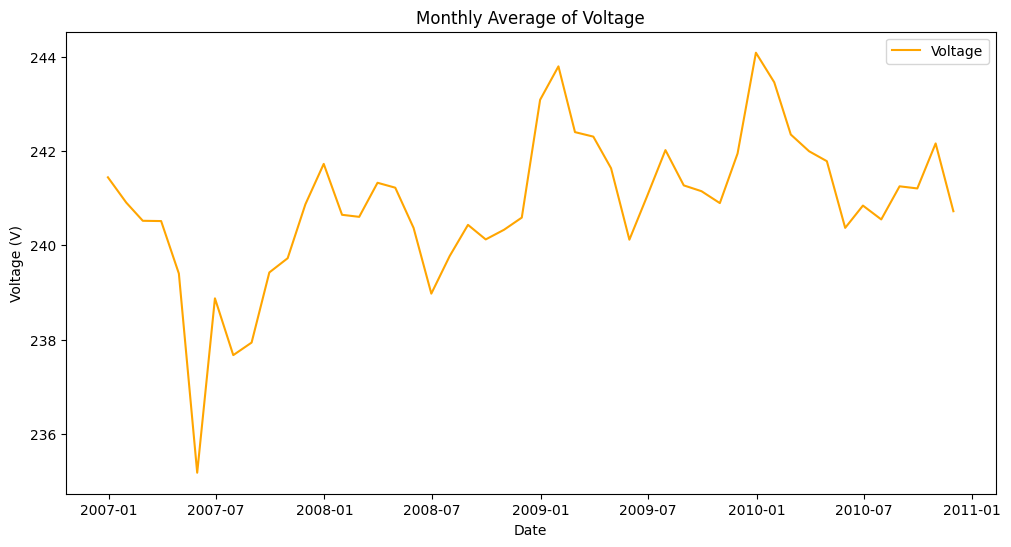

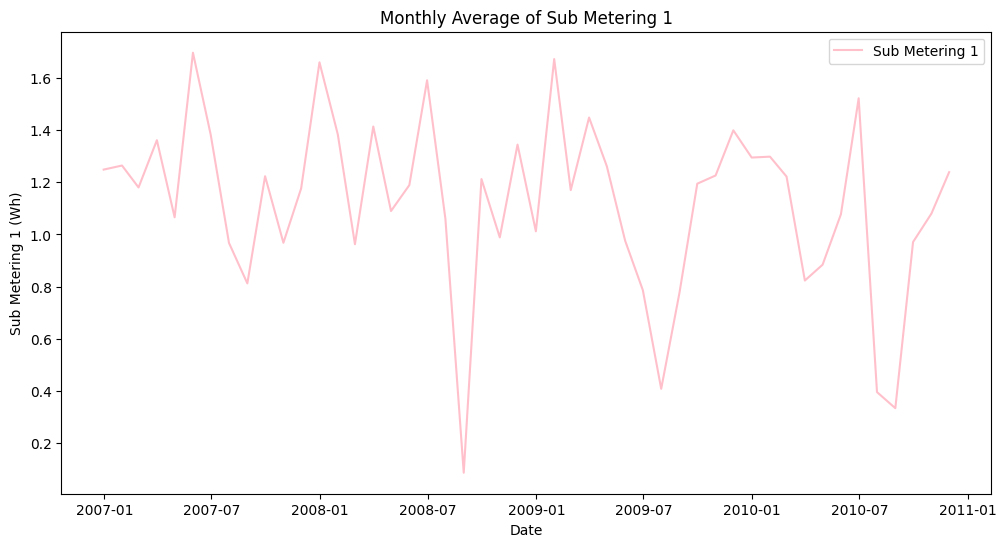

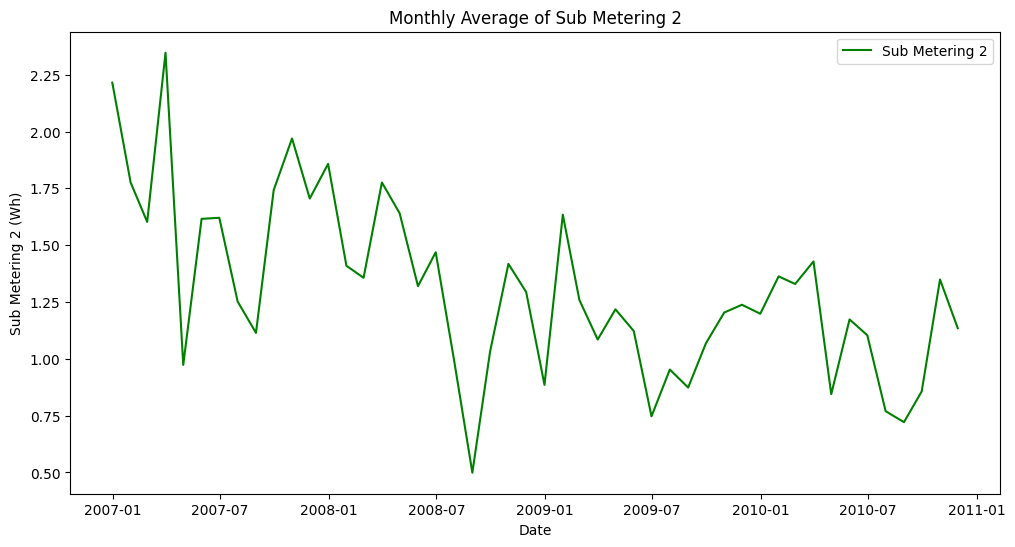

In [63]:
# Compute monthly averages using pd.Grouper
monthly_avg = numeric_df.groupby(pd.Grouper(key='Datetime', freq='ME')).mean()

# Plot Global_active_power over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Global_active_power'], color='black', label='Global Active Power')
plt.title('Monthly Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Plot Voltage over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Voltage'], color='orange', label='Voltage')
plt.title('Monthly Average of Voltage')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Plot Sub_metering_1 over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_1'], color='pink', label='Sub Metering 1')
plt.title('Monthly Average of Sub Metering 1')
plt.xlabel('Date')
plt.ylabel('Sub Metering 1 (Wh)')
plt.legend()
plt.show()

# Plot Sub_metering_2 over months
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['Sub_metering_2'], color='green', label='Sub Metering 2')
plt.title('Monthly Average of Sub Metering 2')
plt.xlabel('Date')
plt.ylabel('Sub Metering 2 (Wh)')
plt.legend()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A:  
1. **Patterns Observed:**
   - **Global Active Power:**
     - Displays clear seasonal variations, with noticeable peaks and troughs recurring annually. These patterns likely correspond to periods of high electricity demand, such as increased heating during winter or cooling during summer.
     - There are also gradual fluctuations over months, reflecting shifts in household power consumption habits or external factors like weather or holidays.
   - **Voltage:**
     - Remains relatively stable across months but shows periodic dips and peaks. These variations may reflect grid-level fluctuations caused by changes in electricity demand, supply constraints, or maintenance activities.
     - The overall trend in Voltage does not exhibit pronounced seasonality but highlights the influence of system-wide factors.
   - **Sub Metering 1 and 2:**
     - Sub Metering 1 and 2 show considerable variability across months, with sharp increases or decreases. These spikes likely correspond to changes in appliance usage or operational patterns (e.g., seasonal appliance use, holidays, or changes in occupancy).
     - Sub Metering 1 (e.g., kitchen appliances) shows a slightly different pattern compared to Sub Metering 2 (e.g., laundry appliances), suggesting that different appliances contribute to power consumption in varying ways.

2. **Relationships Between Variables:**
   - **Global Active Power and Sub Metering 1/2:**
     - Increases in Sub Metering 1 and 2 usage generally align with higher Global Active Power, as these sub-metered appliances form part of the total household electricity consumption. This relationship is logical and supports the hypothesis that spikes in appliance usage drive overall consumption increases.
   - **Voltage and Global Active Power:**
     - There is no strong direct relationship between Voltage and Global Active Power. Voltage fluctuations appear more independent and are likely influenced by broader grid-level dynamics rather than individual household consumption. However, occasional dips in Voltage might align with peak power usage periods, suggesting some interaction.
   - **Sub Metering 1 vs. Sub Metering 2:**
     - These two variables exhibit somewhat complementary usage patterns, with occasional alignment (both increasing) but also independent spikes, which reflect the distinct purposes of the appliances being measured.

3. **Insights and Implications:**
   - **Seasonality:** The monthly patterns in Global Active Power and sub-metering suggest strong seasonal effects, highlighting the influence of weather and appliance use on energy demand.
   - **Grid Impact:** Voltage stability is affected by broader system factors, but its interaction with power demand is minimal, indicating that grid resilience plays a role in maintaining supply.
   - **Appliance-Level Analysis:** The variability in Sub Metering 1 and 2 highlights the importance of studying specific appliance usage to better understand household energy behaviors and identify opportunities for energy efficiency.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [65]:
#compute your moving average here
rolling_avg = df[['Datetime', 'Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']].copy()
rolling_window = 30 * 24 * 60
rolling_avg[['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']] = rolling_avg[
    ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']
].rolling(window=rolling_window, min_periods=1).mean()

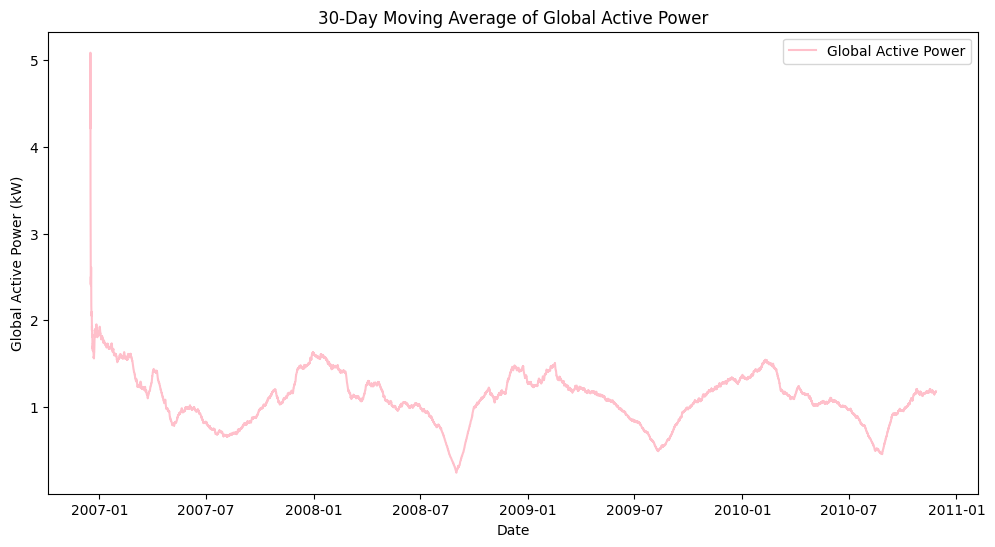

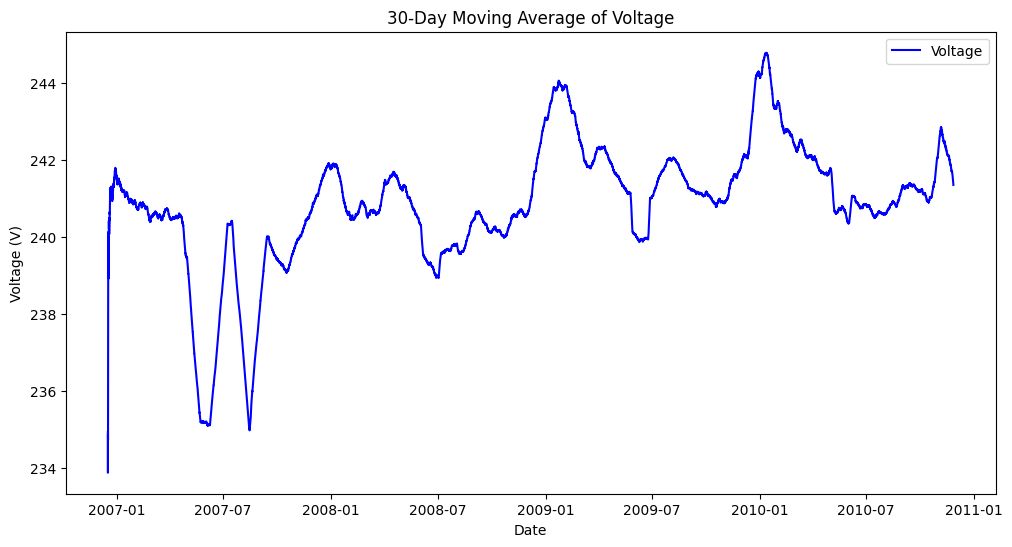

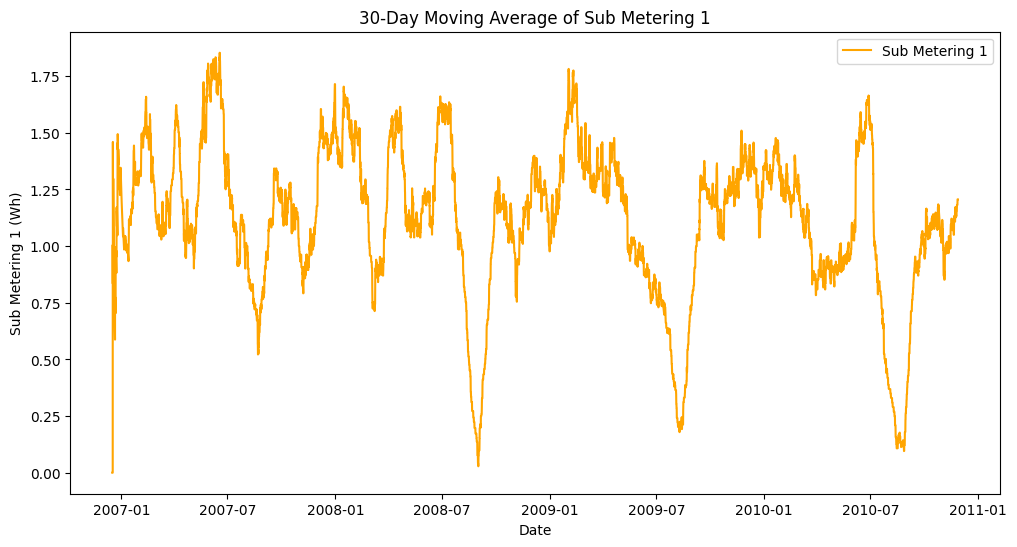

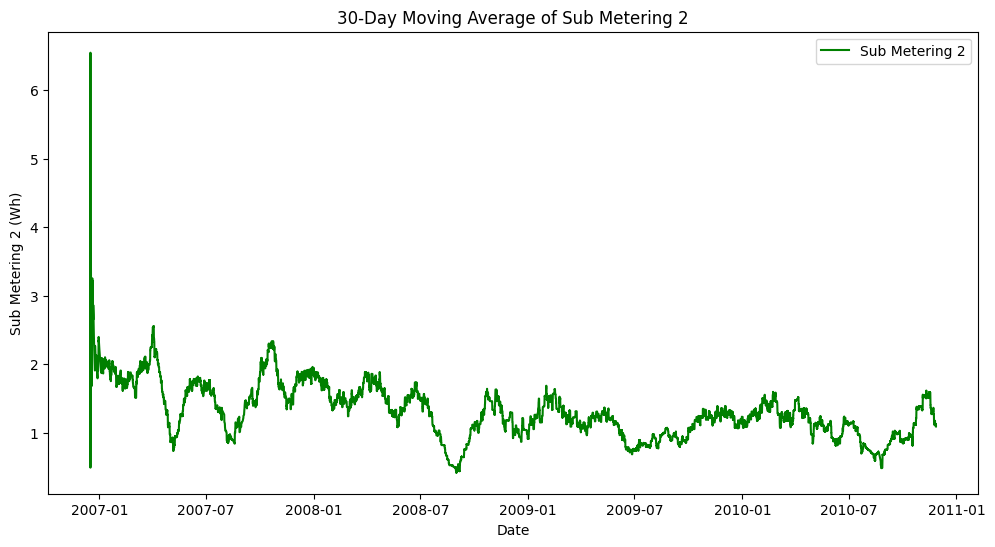

In [67]:
# Plot Global_active_power moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Global_active_power'], color='pink', label='Global Active Power')
plt.title('30-Day Moving Average of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Plot Voltage moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Voltage'], color='blue', label='Voltage')
plt.title('30-Day Moving Average of Voltage')
plt.xlabel('Date')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

# Plot Sub_metering_1 moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Sub_metering_1'], color='orange', label='Sub Metering 1')
plt.title('30-Day Moving Average of Sub Metering 1')
plt.xlabel('Date')
plt.ylabel('Sub Metering 1 (Wh)')
plt.legend()
plt.show()

# Plot Sub_metering_2 moving average
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg['Datetime'], rolling_avg['Sub_metering_2'], color='green', label='Sub Metering 2')
plt.title('30-Day Moving Average of Sub Metering 2')
plt.xlabel('Date')
plt.ylabel('Sub Metering 2 (Wh)')
plt.legend()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A:
1. **Comparison:**
   - The **monthly average** offers a simplified and aggregated view of the data, effectively summarizing trends over each month. This approach is particularly useful for identifying long-term trends, seasonal variations, and year-over-year comparisons. However, the discrete nature of monthly averages can obscure finer details within each month.
   - The **30-day moving average** provides a smoothed, continuous representation of the data. It retains more granularity than monthly averages, making it better suited for capturing gradual changes, short-term fluctuations, and local trends. Unlike the monthly average, it avoids abrupt transitions by leveraging overlapping time periods.

2. **Effectiveness:**
   - The **monthly average** is more effective when the goal is to understand broad patterns and high-level trends over extended periods. It is ideal for long-term analysis, especially when dealing with dense datasets that require summarization to enhance interpretability.
   - The **30-day moving average** excels at highlighting subtle variations and rolling trends, making it better suited for analyzing short-term behaviors, detecting anomalies, and identifying transitions between different states of the data.

3. **Recommendation:**
   - Use the **monthly average** for high-level reporting, seasonal analysis, and long-term trend identification. It is especially effective when presenting insights to stakeholders or summarizing data for strategic decisions.
   - Use the **30-day moving average** for operational insights, detecting anomalies, and understanding short-term dynamics within the dataset. It is particularly useful for tasks requiring a more granular and continuous view of the data.


## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

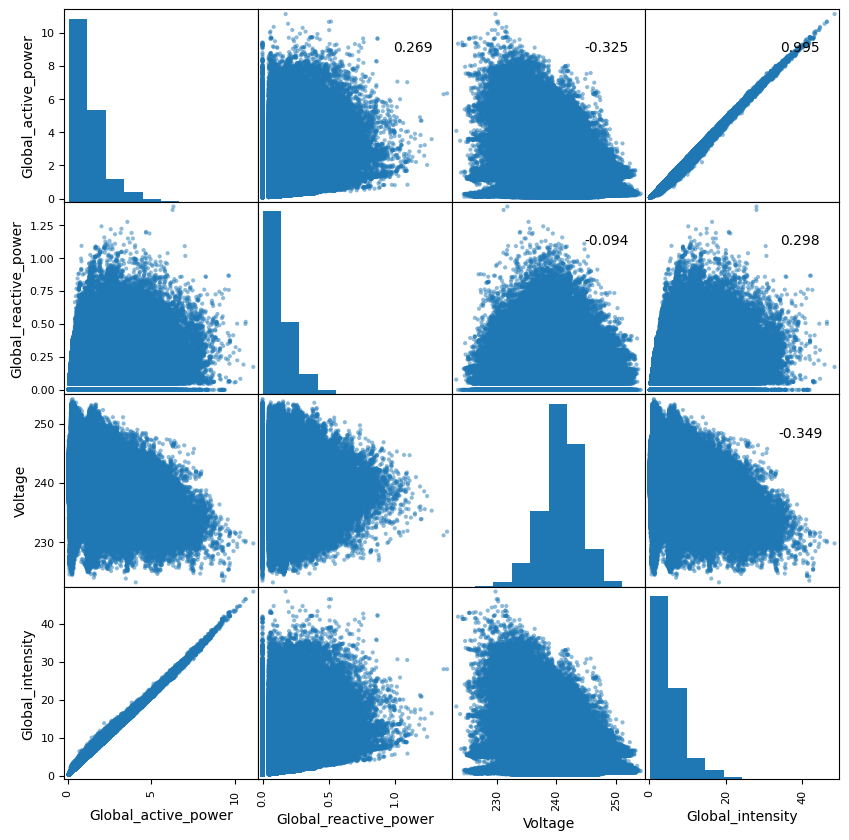

In [28]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:   
### Patterns and Correlations

1. **Global Active Power and Global Intensity (0.985):**  
   - There is a strong positive correlation between these two variables. This reflects the direct relationship between current drawn by appliances and total power consumption. The high correlation indicates that both variables essentially capture similar aspects of energy usage.

2. **Global Reactive Power and Global Active Power (0.269):**  
   - A moderate positive correlation suggests that reactive power is influenced by active power but is not directly proportional. This relationship arises from the power factor and the specific nature of inductive and capacitive loads.

3. **Voltage and Global Intensity (-0.349):**  
   - The negative correlation shows that increased current (due to higher power consumption) causes voltage to drop. This behavior is consistent with the operation of power distribution networks under heavy loads, where resistance in the network impacts voltage stability.

4. **Voltage and Global Active Power (-0.325):**  
   - Similarly, the inverse relationship between voltage and active power suggests that periods of high energy consumption result in slight dips in supply voltage, reflecting stress on the grid.

5. **Global Reactive Power and Voltage (-0.094):**  
   - The weak correlation indicates that reactive power is largely independent of voltage changes. Reactive power is influenced more by the nature of the electrical load rather than fluctuations in voltage.


### Impact on Downstream Tasks

1. **Feature Selection:**  
   - Strongly correlated variables (e.g., Global Active Power and Global Intensity) may introduce multicollinearity in predictive models. To address this, one of the variables can be excluded, or dimensionality reduction techniques can be applied to avoid redundancy.

2. **Data Transformation:**  
   - Non-linear relationships, such as the inverse correlation between voltage and active power, may require transformations or advanced modeling techniques to fully capture their interactions. This ensures accurate feature representation in downstream tasks.

3. **Predictive Modeling:**  
   - Correlation insights inform feature engineering and model selection. For example:
     - Voltage drops correlated with high energy consumption can be used to predict grid stress or detect anomalies.
     - Reactive power trends can support models aimed at optimizing energy efficiency or predicting peak loads.

4. **Dimensionality Reduction:**  
   - Correlated variables can be combined using techniques like Principal Component Analysis (PCA). This reduces the dimensionality of the dataset, simplifying model computation while preserving critical information.

5. **Operational Insights:**  
   - For utility providers:
     - Monitoring Voltage and Reactive Power correlations can help optimize grid management and stability.
     - Identifying periods of high Global Intensity can guide demand-side management strategies.
   - For consumers:
     - Sub-metering data can help pinpoint inefficient appliances or identify opportunities for energy savings.

### Summary  
Understanding the patterns and correlations in the dataset enables better decision-making for preprocessing, feature engineering, and predictive modeling. Leveraging these relationships ensures that the data is used effectively in downstream tasks while enhancing interpretability and performance.